In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_jaw_shape(df, stage):
    """
    Plot the jaw shape for a given developmental stage.

    :param df: DataFrame containing the jaw data.
    :param stage: Developmental stage to plot.
    """
    stage_data = df[df['stage'] == stage]
    plt.figure(figsize=(8, 6))
    plt.plot(stage_data['x'], stage_data['y'], marker='o')
    plt.title(f'Zebrafish Jaw Shape at Stage {stage}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

In [9]:
def calculate_statistics(df):
    """
    Calculate and print descriptive statistics for each stage.

    :param df: DataFrame containing the jaw data.
    """
    grouped = df.groupby('stage')
    stats = grouped[['x', 'y']].agg(['mean', 'std', 'min', 'max'])
    return stats

In [10]:
def plot_growth_rate(df, num_stages):
    """
    Plot the growth rate of the jaw based on average coordinate changes.

    :param df: DataFrame containing the jaw data.
    :param num_stages: Number of developmental stages.
    """
    mean_coordinates = df.groupby('stage').mean()
    growth_rates = mean_coordinates.diff().fillna(0)

    plt.figure(figsize=(10, 6))
    plt.plot(growth_rates['x'], label='X Coordinate Growth Rate')
    plt.plot(growth_rates['y'], label='Y Coordinate Growth Rate')
    plt.title('Growth Rate of Zebrafish Jaw Coordinates')
    plt.xlabel('Developmental Stage')
    plt.ylabel('Growth Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

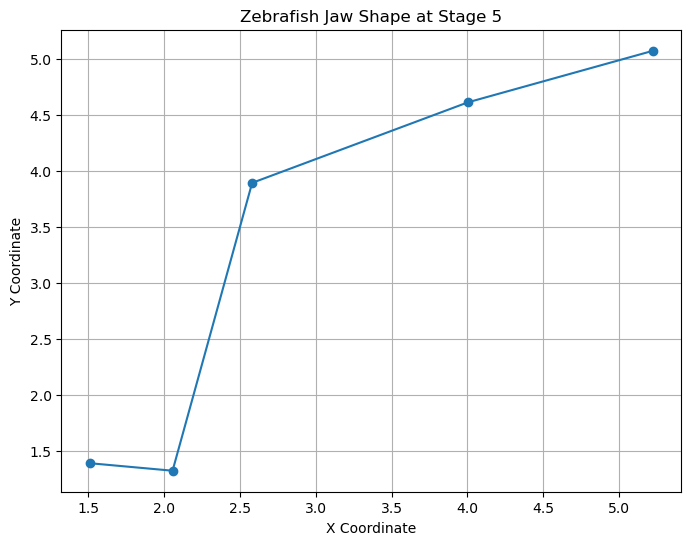

              x                                       y                      \
           mean       std       min       max      mean       std       min   
stage                                                                         
0      1.490789  1.644176 -1.140982  3.096318  1.760300  2.029117 -0.858464   
1      2.226074  1.804954 -0.275262  4.507405  2.152050  1.967702 -0.134229   
2      2.231027  1.784244  0.054532  4.475191  2.252513  1.554534  0.106592   
3      2.898330  1.394154  1.227841  4.869289  2.438261  1.593410  0.218512   
4      2.762785  1.829716  0.315785  5.226724  2.653546  1.405967  0.846599   
5      3.074940  1.518494  1.508713  5.225493  3.259952  1.789134  1.321658   
6      3.372897  0.987590  2.257912  4.724699  3.354306  1.312931  1.573480   
7      3.310366  1.672303  1.198870  4.906594  3.608060  1.438647  1.862953   
8      3.395850  1.511252  1.765045  5.374163  3.684528  1.608191  1.500390   
9      3.886233  1.984388  1.398868  6.395006  3.973

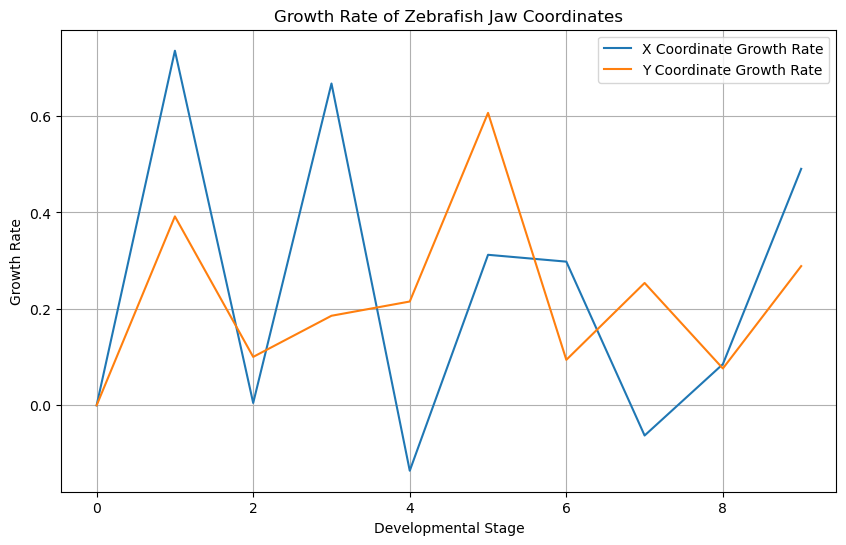

In [15]:
# Example usage with an existing dataset 'data'
# Plot jaw shape for a specific stage
# Load the dataset from the CSV file
data = pd.read_csv('/Users/mr19220/Downloads/zebrafish_jaw_dummy_data.csv')

# Plot jaw shape for a specified stage
plot_jaw_shape(data, 5)

# Calculate and display statistics
stats = calculate_statistics(data)
print(stats)

# Plot growth rate
plot_growth_rate(data, 10)


In [18]:
import pandas as pd
import plotly.express as px

def plot_jaw_shape_interactive(df, stage):
    """
    Plot the jaw shape for a given developmental stage with interactivity.

    :param df: DataFrame containing the jaw data.
    :param stage: Developmental stage to plot.
    """
    stage_data = df[df['stage'] == stage]

    fig = px.line(stage_data, x='x', y='y', markers=True, title=f'Zebrafish Jaw Shape at Stage {stage}')
    fig.update_traces(text=stage_data['point'], textposition='top center')
    fig.update_layout(xaxis_title='X Coordinate', yaxis_title='Y Coordinate')
    
    fig.show()

# Example (with an existing dataset 'data')
plot_jaw_shape_interactive(data, 5)

In [23]:
## to 
from sklearn.linear_model import LinearRegression

def predict_future_jaw_shapes(df, future_stages):
    """
    Predict the jaw shape at future developmental stages using linear regression.

    :param df: DataFrame containing the jaw data.
    :param future_stages: A list of future stages to predict.
    :return: DataFrame with predicted jaw shapes.
    """
    predictions = {'stage': [], 'point': [], 'x': [], 'y': []}

    for point in df['point'].unique():
        point_data = df[df['point'] == point]

        # Linear Regression Models for x and y coordinates
        model_x = LinearRegression().fit(np.array(point_data['stage']).reshape(-1, 1), point_data['x'])
        model_y = LinearRegression().fit(np.array(point_data['stage']).reshape(-1, 1), point_data['y'])

        for stage in future_stages:
            predictions['stage'].append(stage)
            predictions['point'].append(point)
            predictions['x'].append(model_x.predict([[stage]])[0])
            predictions['y'].append(model_y.predict([[stage]])[0])

    return pd.DataFrame(predictions)

# Example
future_stages = [10, 11, 12, 13, 14]  # Assuming the original data has stages up to 9
predicted_shapes = predict_future_jaw_shapes(data, future_stages)
print(predicted_shapes)

    stage  point         x         y
0      10      0  2.477026  2.439213
1      11      0  2.769518  2.732461
2      12      0  3.062010  3.025709
3      13      0  3.354502  3.318957
4      14      0  3.646995  3.612205
5      10      1  2.795190  3.269134
6      11      1  2.959206  3.481964
7      12      1  3.123222  3.694793
8      13      1  3.287238  3.907622
9      14      1  3.451255  4.120451
10     10      2  4.036623  4.774901
11     11      2  4.228899  5.112024
12     12      2  4.421176  5.449148
13     13      2  4.613452  5.786271
14     14      2  4.805729  6.123394
15     10      3  4.918895  5.139068
16     11      3  5.124476  5.375347
17     12      3  5.330057  5.611626
18     13      3  5.535638  5.847905
19     14      3  5.741219  6.084184
20     10      4  6.243575  5.742045
21     11      4  6.506784  5.898201
22     12      4  6.769993  6.054356
23     13      4  7.033202  6.210511
24     14      4  7.296411  6.366666
